In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV and Perform Basic Data Cleaning

In [62]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [63]:
# koi_dispositions:
# "CONFIRMED": objects confirmed to be exoplanets.
# "CANDIDATE": have not yet been formally classified
# "FALSE POSITIVE" objects determined not to be exoplanets.
# Hence, drop "CANDIDATE" rows for training models
df = df.drop(df.index[df["koi_disposition"] == 'CANDIDATE'])
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [64]:
# Calculate menas by koi_disposition
test1 = df.copy()
test2 = test1.groupby("koi_disposition")
test2.mean().T

koi_disposition,CONFIRMED,FALSE POSITIVE
koi_fpflag_nt,0.009444,0.308505
koi_fpflag_ss,0.011667,0.476027
koi_fpflag_co,0.003333,0.403253
koi_fpflag_ec,0.000556,0.249144
koi_period,26.451343,66.103066
koi_period_err1,0.000190,0.002556
koi_period_err2,-0.000190,-0.002556
koi_time0bk,156.532602,166.012645
koi_time0bk_err1,0.004084,0.010165
koi_time0bk_err2,-0.004084,-0.010165


In [65]:
# Calculate stdev by koi_disposition
test1 = df.copy()
test2 = test1.groupby("koi_disposition")
test2.std().T

koi_disposition,CONFIRMED,FALSE POSITIVE
koi_fpflag_nt,0.096749,0.461942
koi_fpflag_ss,0.107410,0.499496
koi_fpflag_co,0.057655,0.490621
koi_fpflag_ec,0.023570,0.432579
koi_period,53.171021,135.529433
koi_period_err1,0.000644,0.008838
koi_period_err2,0.000644,0.008838
koi_time0bk,40.809356,73.153031
koi_time0bk_err1,0.006683,0.022828
koi_time0bk_err2,0.006683,0.022828


In [66]:
# Setup for histograms
testing = df.drop("koi_disposition", axis=1)
testing = (testing - testing.min()) / (testing.max() - testing.min())
testing.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0.0,0.0,0.0,0.0,0.050534,0.001581,0.998419,0.031063,0.006171,0.993829,...,0.953260,0.844156,0.043478,0.904667,0.004508,0.004045,0.999412,0.552405,0.733837,0.692702
1,0.0,1.0,0.0,0.0,0.018301,0.000095,0.999905,0.040928,0.001006,0.998994,...,0.898442,0.858862,0.029891,0.825223,0.004180,0.008977,0.999249,0.784312,0.733360,0.700058
2,0.0,1.0,0.0,0.0,0.001342,0.000002,0.999998,0.036828,0.000187,0.999813,...,0.899596,0.862681,0.036005,0.833168,0.003752,0.007744,0.999355,0.259712,0.742947,0.713365
3,0.0,0.0,0.0,0.0,0.002078,0.000024,0.999976,0.037781,0.001971,0.998029,...,0.878246,0.838617,0.047554,0.791460,0.005170,0.012868,0.998719,0.406994,0.739203,0.706091
4,0.0,0.0,0.0,0.0,0.003581,0.000067,0.999933,0.038804,0.003324,0.996676,...,0.866128,0.847785,0.036685,0.772592,0.004758,0.012136,0.998989,0.751443,0.739105,0.723035


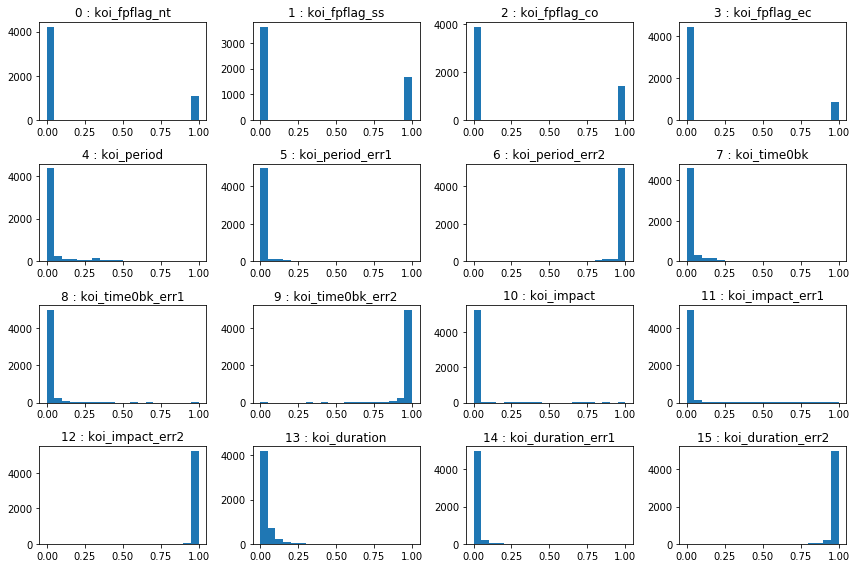

In [67]:
# Plot histogram of each independent variable
j = 0 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(16):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_0_15.png")
plt.show()

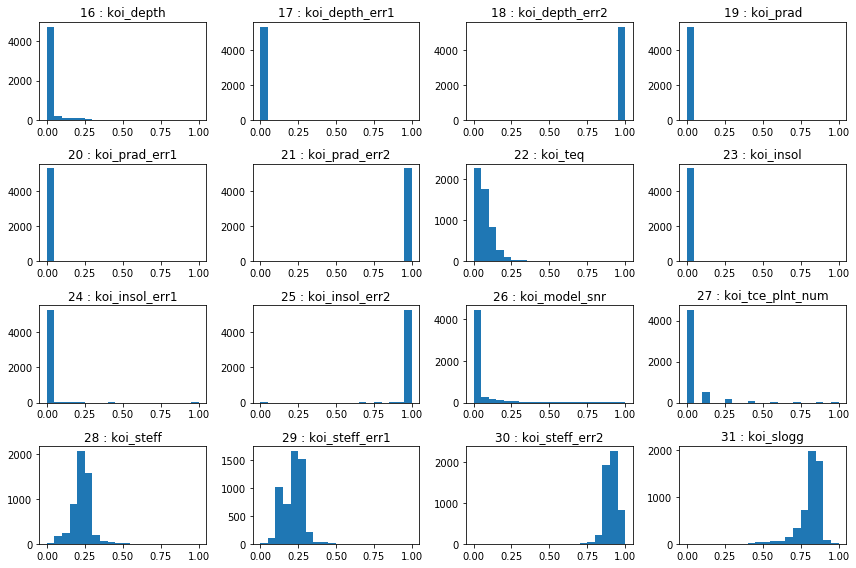

In [68]:
# Plot histogram of each independent variable
j = 16 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(16):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_16_31.png")
plt.show()

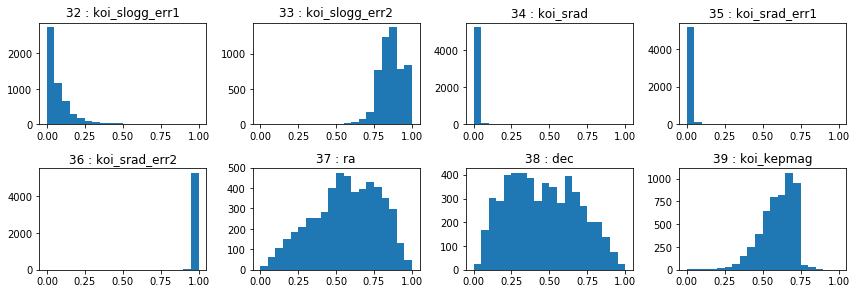

In [69]:
# Plot histogram of each independent variable
j = 32 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(8):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_32_40.png")
plt.show()

In [70]:
# Drop columns (mean, std, graph same as ..._err1 expect negative)
col_name = ["koi_period_err2",  "koi_time0bk_err2", "koi_duration_err2", "koi_depth_err2"]
df = df.drop(col_name, axis=1)
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,0.586,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,175.850252,0.000581,0.969,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,1.276,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,171.595550,0.001130,0.701,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,172.979370,0.001900,0.762,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [71]:
# Set features for log reg model
X = df.drop("koi_disposition", axis=1).copy()
y = df["koi_disposition"]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Scaler = MinMaxScaler().fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)
#print(X_train_scaled[:2])

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_e = np.array(label_encoder.transform(y_train))
y_test_e = np.array(label_encoder.transform(y_test))
#print(y_train_e.shape)

C:\Users\mryet\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Model



In [73]:
# Create a support vector machine linear classifer and fit it to the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train_e)
print(model.score(X_train_scaled, y_train_e))
print(model.score(X_test_scaled, y_test_e))

0.9904474610356964
0.9901960784313726


C:\Users\mryet\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# RFE - Feature Elimination

In [74]:
# Create the RFE model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
modelRFE = LogisticRegression(C=0.2, solver='lbfgs')
#LogisticRegression(C=0.1, solver='lbfgs', multi_class='multinomial')
rfe = RFE(modelRFE, n_features_to_select=None, step=1, verbose=0)
rfe = rfe.fit(X_train_scaled, y_train_e)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False  True False False False False
  True  True False False False False  True False False False  True  True
  True  True  True  True  True  True False False False  True False False]
[ 1  1  1  1  1  4  2  1  9  3 12  6  1  1 19 14 13 15  1 18 16 17  1  1
  1  1  1  1  1  1 10  7 11  1  5  8]


In [75]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  4,  2,  1,  9,  3, 12,  6,  1,  1, 19, 14, 13,
       15,  1, 18, 16, 17,  1,  1,  1,  1,  1,  1,  1,  1, 10,  7, 11,  1,
        5,  8])

In [76]:
# Set features for log reg model - Remove with rank above 1
j = 0
cols = [0]
for i in rfe.ranking_ :
    j=j+1
    if (i > 1):
        cols.append(j)

X_rfe = df.drop(df.columns[cols],axis=1)
y_rfe = df["koi_disposition"]

In [77]:
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, random_state=1, stratify=y)

Scaler = MinMaxScaler().fit(X_rfe_train)
X_rfe_train_scaled = Scaler.transform(X_rfe_train)
X_rfe_test_scaled = Scaler.transform(X_rfe_test)
#print(X_train_scaled[:2])

label_encoder = LabelEncoder()
label_encoder.fit(y_rfe_train)
y_rfe_train_e = np.array(label_encoder.transform(y_rfe_train))
y_rfe_test_e = np.array(label_encoder.transform(y_rfe_test))
#print(y_train_e.shape)


C:\Users\mryet\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [78]:
model_rfe = LogisticRegression()
model_rfe.fit(X_rfe_train_scaled, y_rfe_train_e)
print(model_rfe.score(X_rfe_train_scaled, y_rfe_train_e))
print(model_rfe.score(X_rfe_test_scaled, y_rfe_test_e))

0.9904474610356964
0.9901960784313726


C:\Users\mryet\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
cols

[0, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18, 20, 21, 22, 31, 32, 33, 35, 36]